# Movies Data Analysis 🎥

Preparing Required Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

This is an one time style notebook charts

In [2]:
# Chart colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#525df4","#ed4a7b","#087783","#3c6372"]) 
# Chart Background
mpl.rcParams['axes.facecolor'] = "#e4f2ffaa"

# Quick title
def plot(x = "", y = "", title = ""):
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)

## Let's Deep Dive in Data Set 🧐📊

In [3]:
data = pd.read_csv("tmdb-movies.csv")

data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### Analysis according to 

Let's See The Invested Budget that the movies companies Every Year

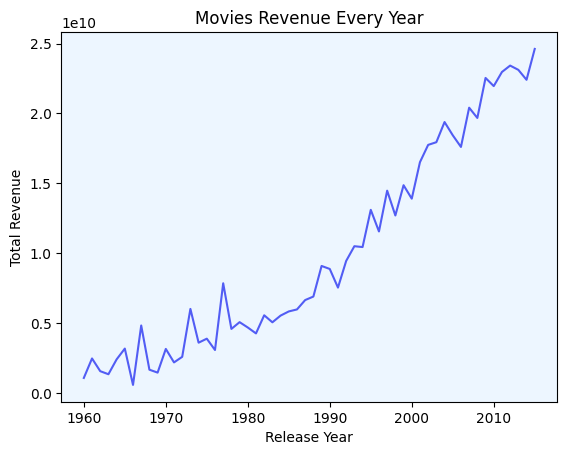

In [11]:
filter = data.groupby("release_year")["revenue_adj"].sum()

plot("Release Year", "Total Revenue", "Movies Revenue Every Year")
plt.plot(filter)

Revenue of Movies are growing massively every year

Let's see top movies that makes large `revenue` according to `Genres`

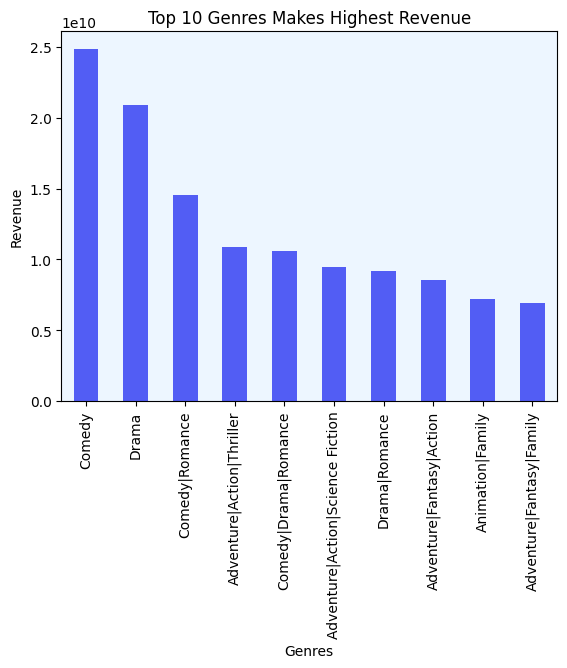

In [12]:
data.groupby("genres")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Genres", "Revenue", "Top 10 Genres Makes Highest Revenue")

`Comedy` and `Drama` are in the sky 🤯

Let's see Top Director, Pro Companies makes revenue

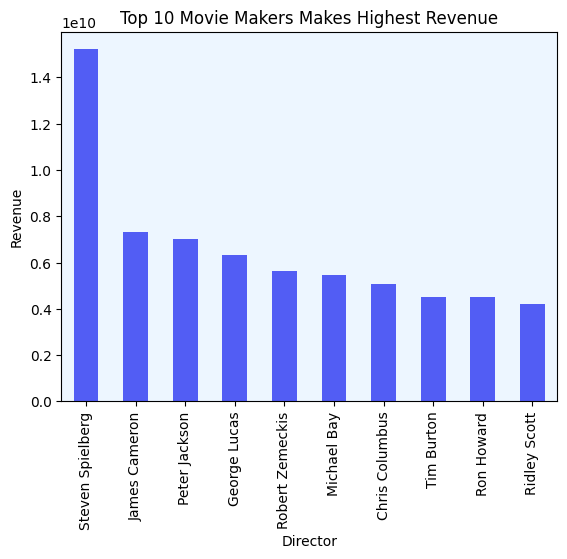

In [13]:
data.groupby("director")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")

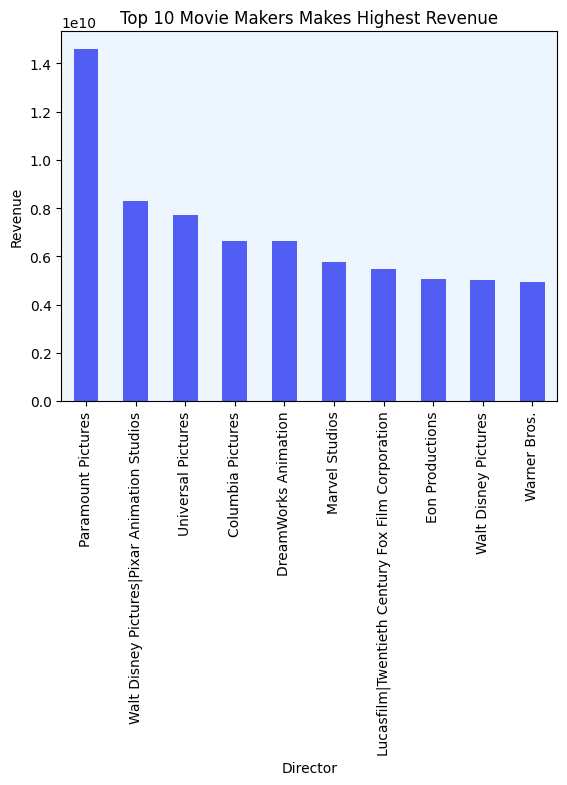

In [16]:
data.groupby("production_companies")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")

<Axes: xlabel='budget', ylabel='revenue_adj'>

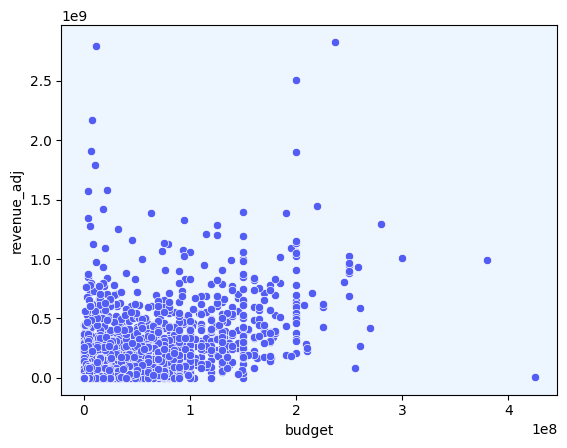

In [17]:
sns.scatterplot(x = 'budget', y = 'revenue_adj', data= data)

In [20]:
# Because there is a missing budgets
# true_data = data[data["budget"] > 10000]

data[(data['revenue_adj'] / data['budget_adj']) > 1].shape[0]

3773